Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



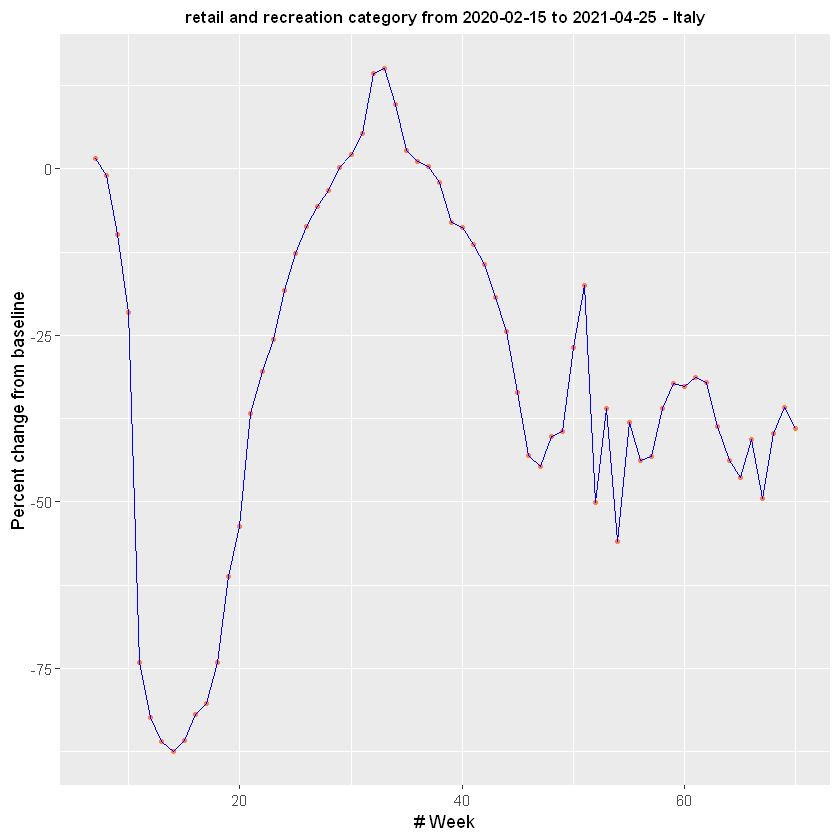

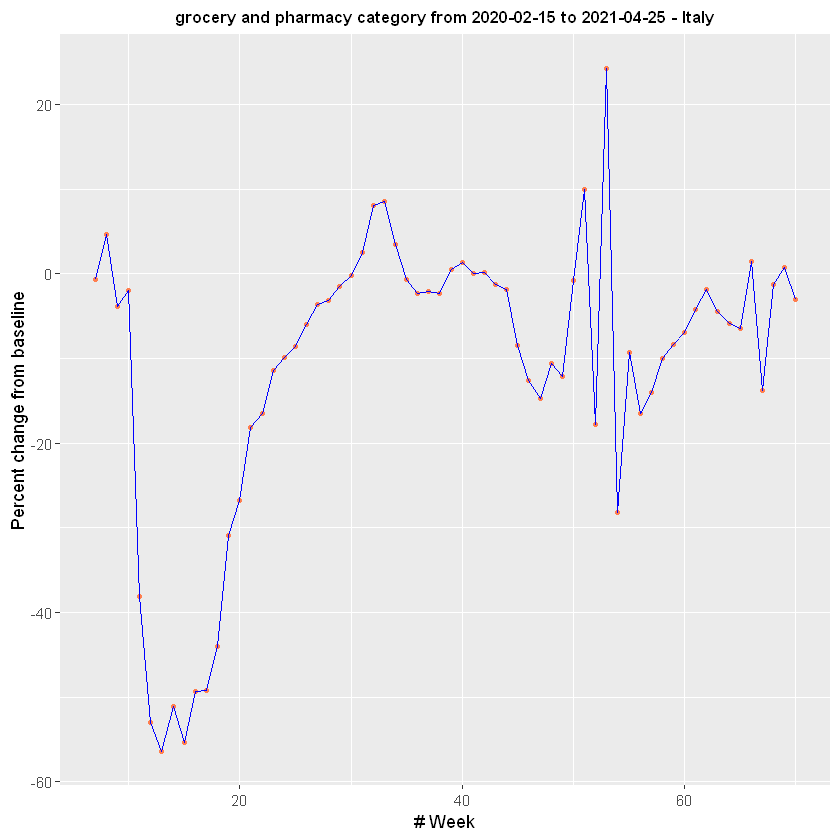

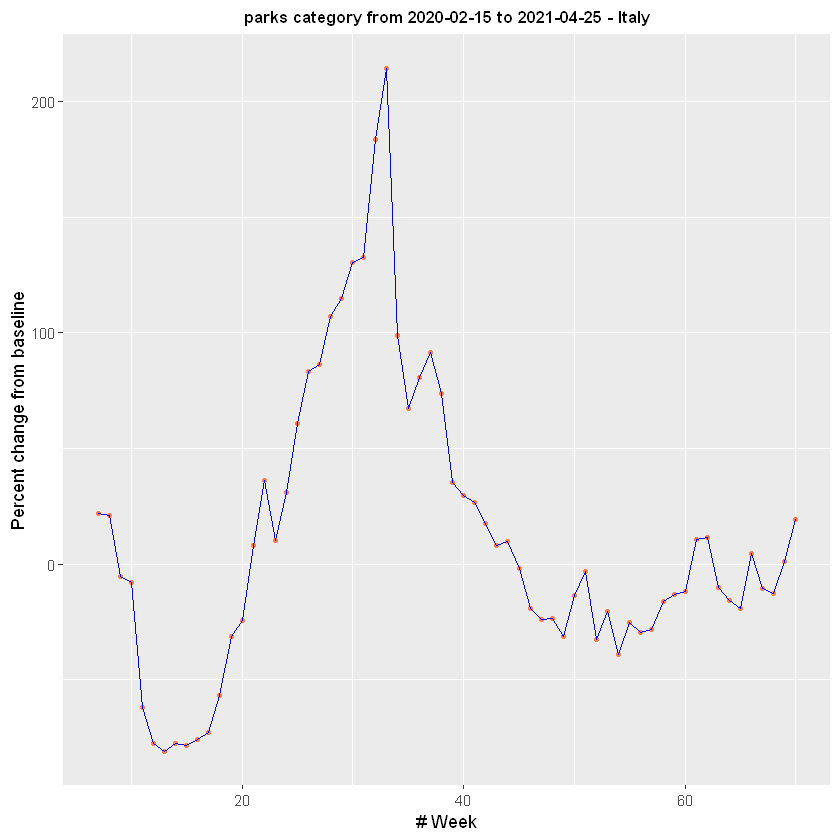

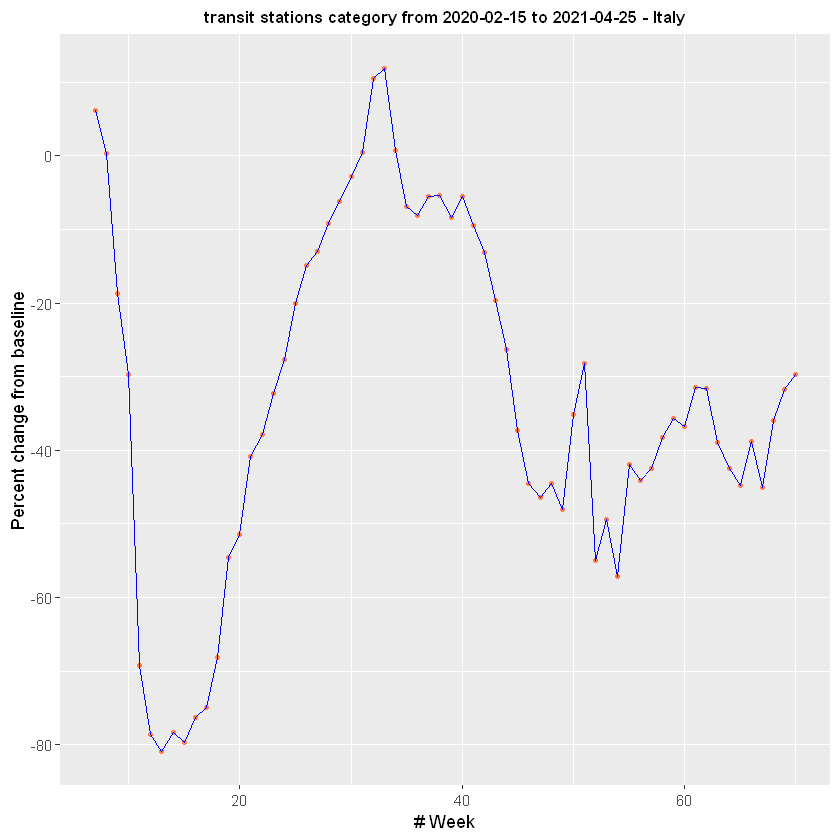

$`retail and recreation`

$`grocery and pharmacy`

$parks

$`transit stations`

$workplaces

$residential


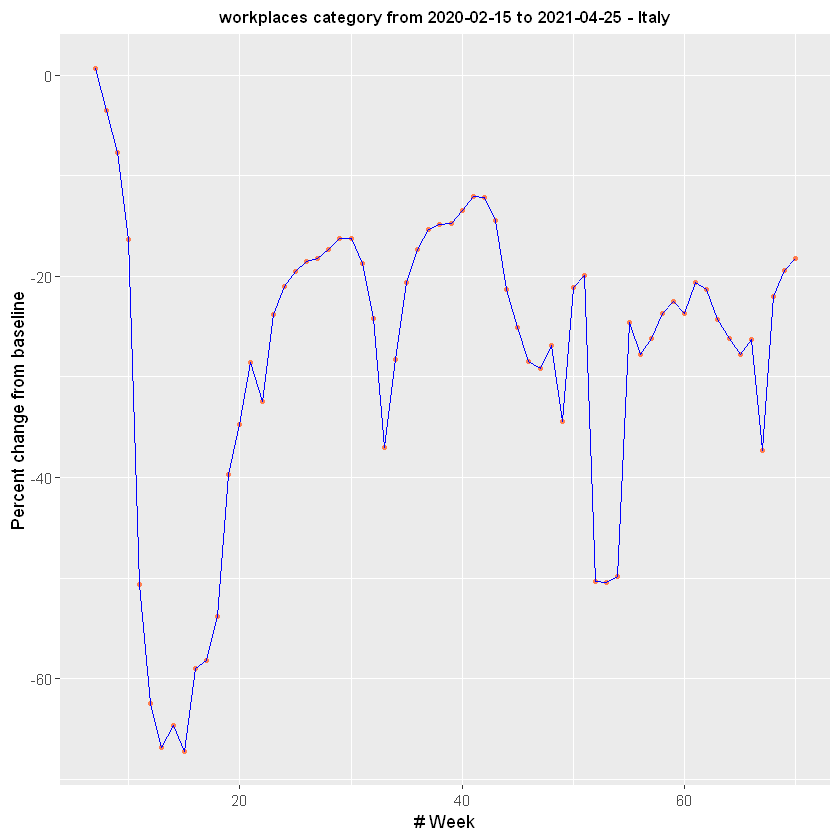

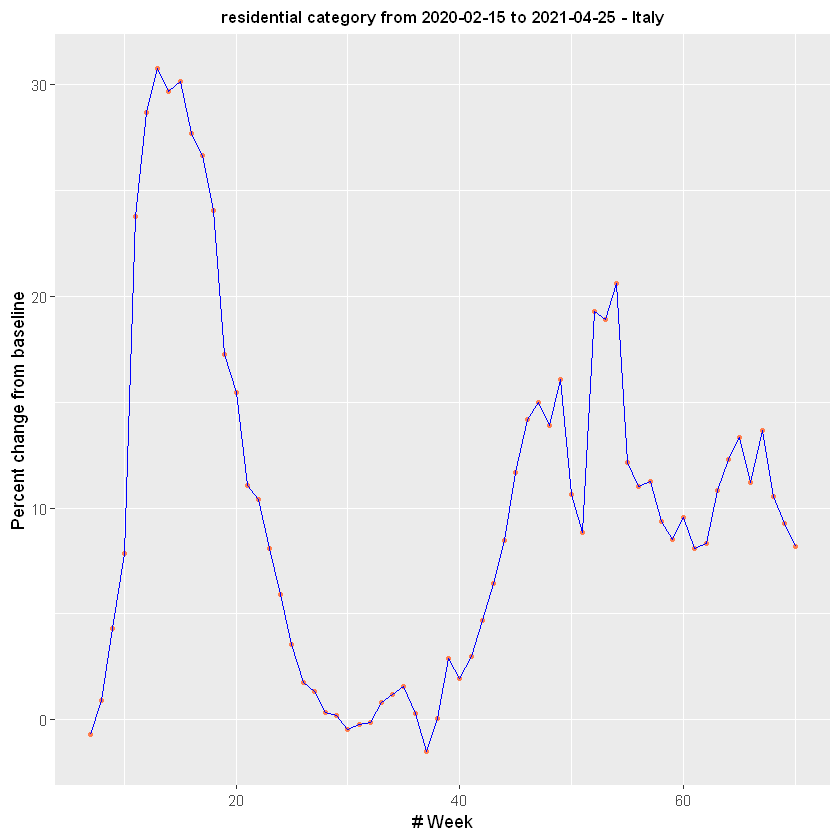

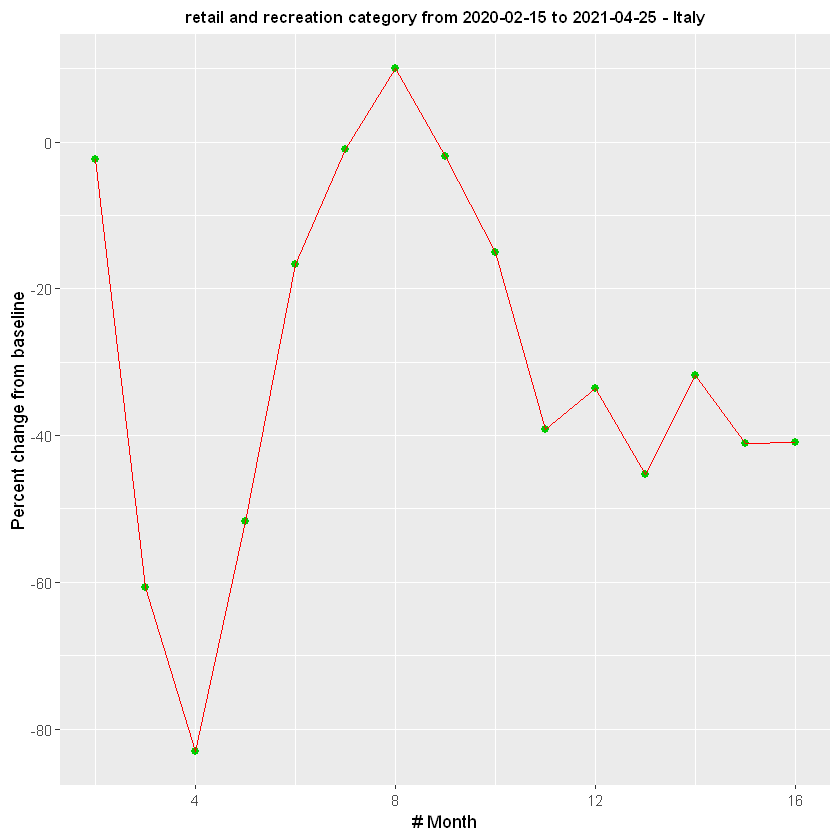

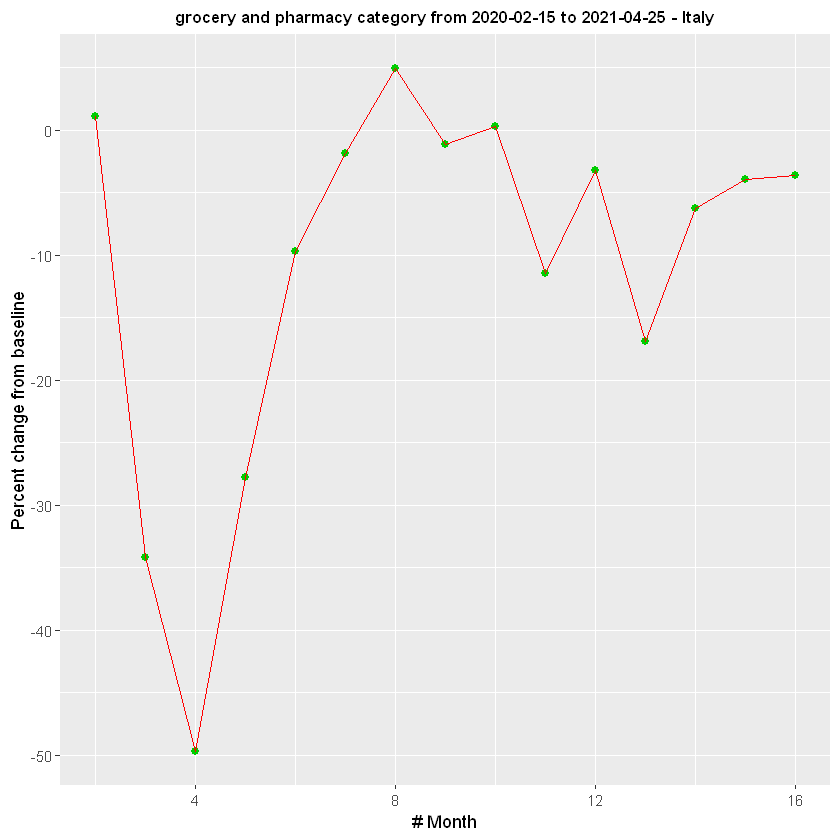

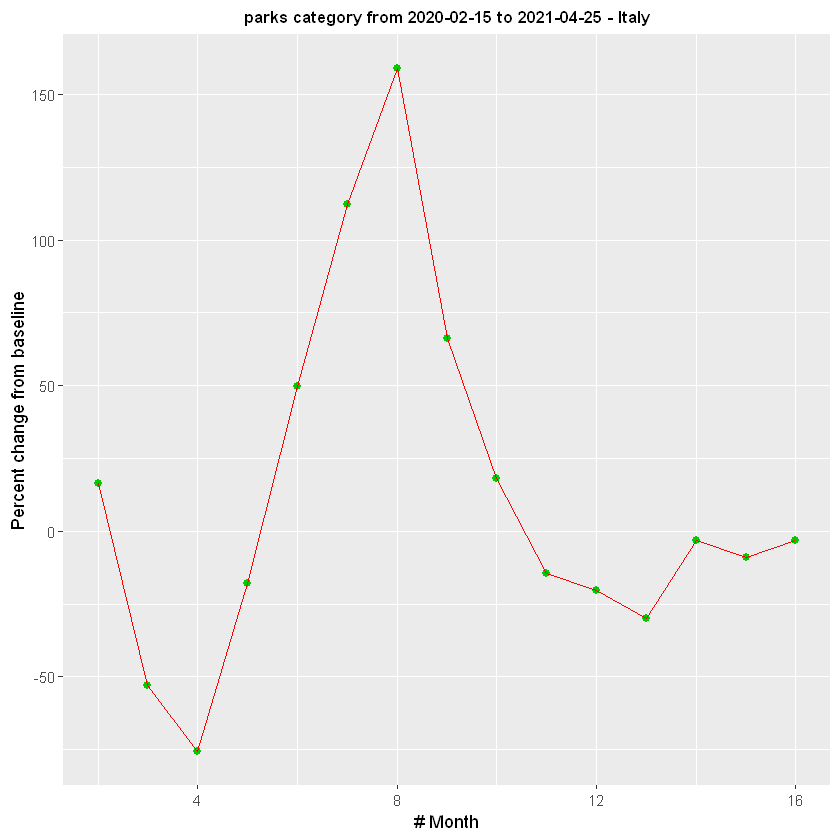

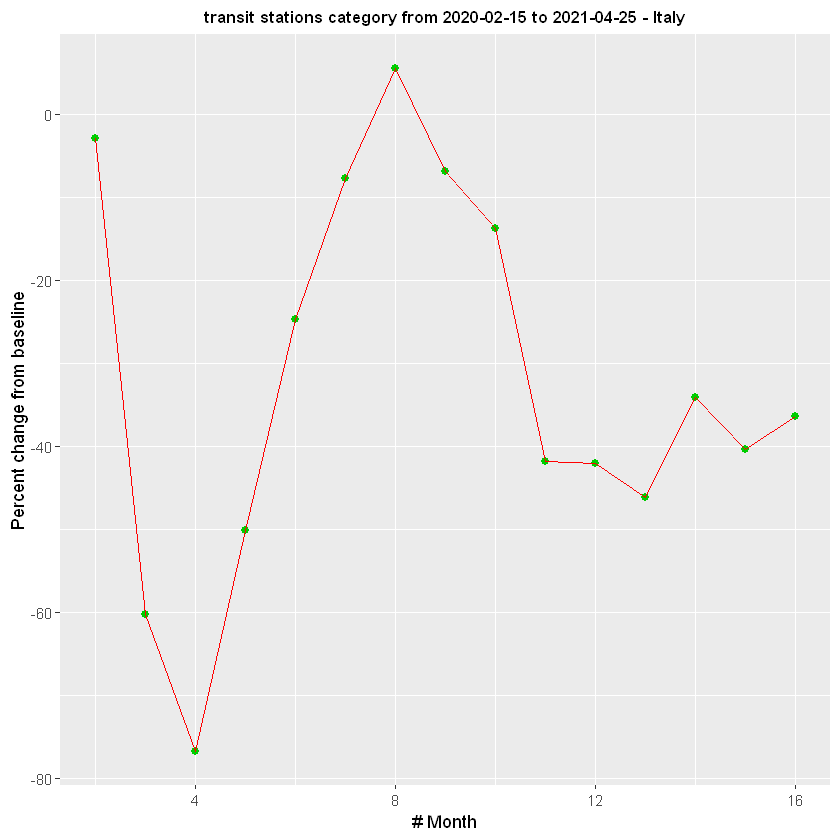

$`retail and recreation`

$`grocery and pharmacy`

$parks

$`transit stations`

$workplaces

$residential


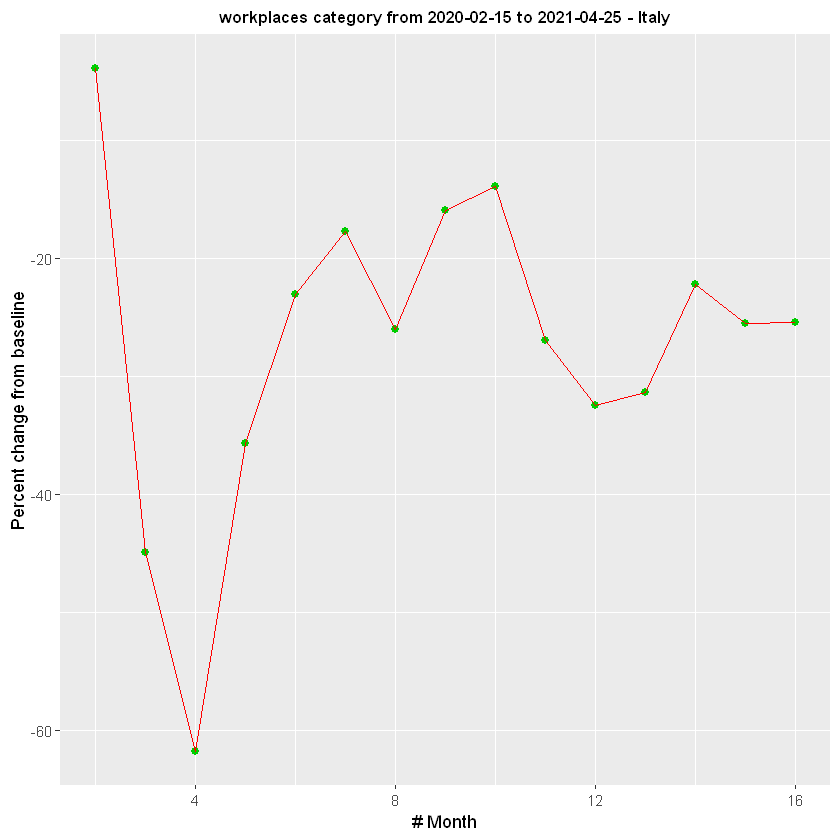

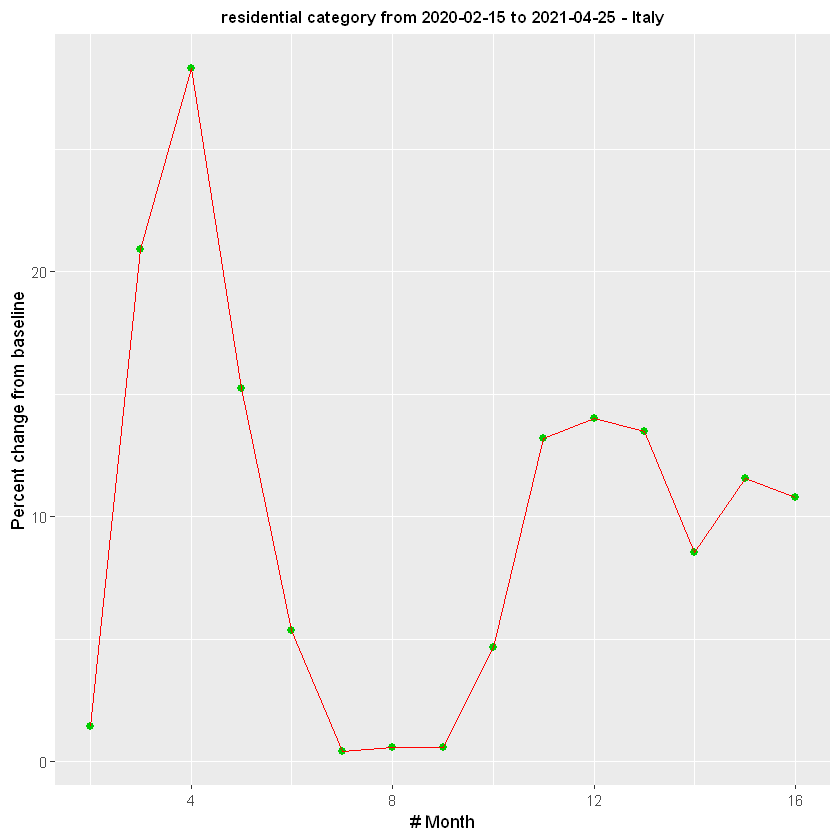

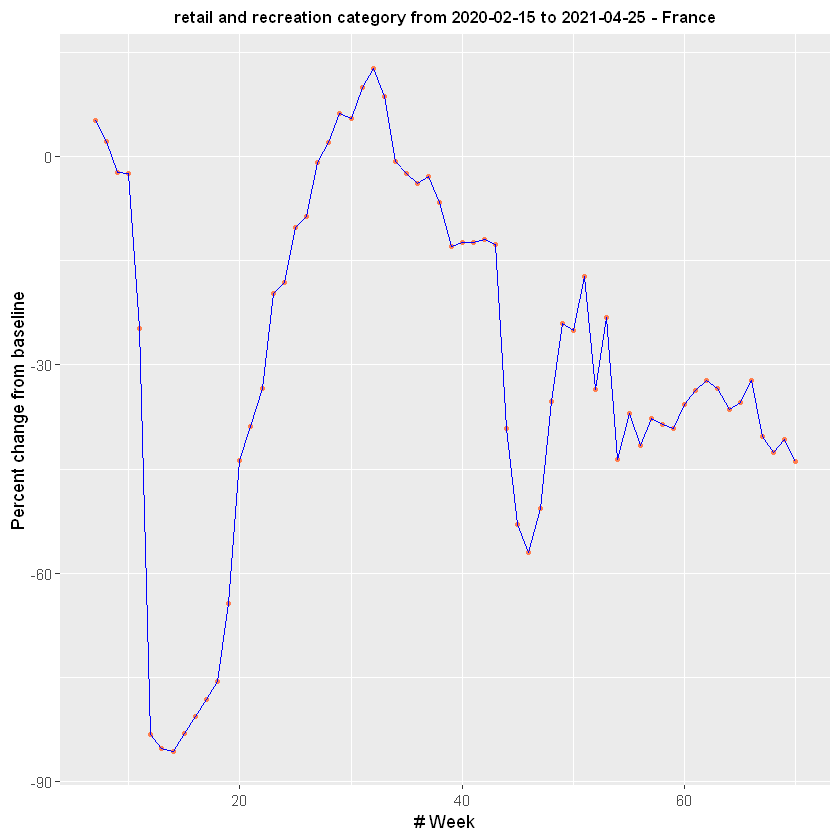

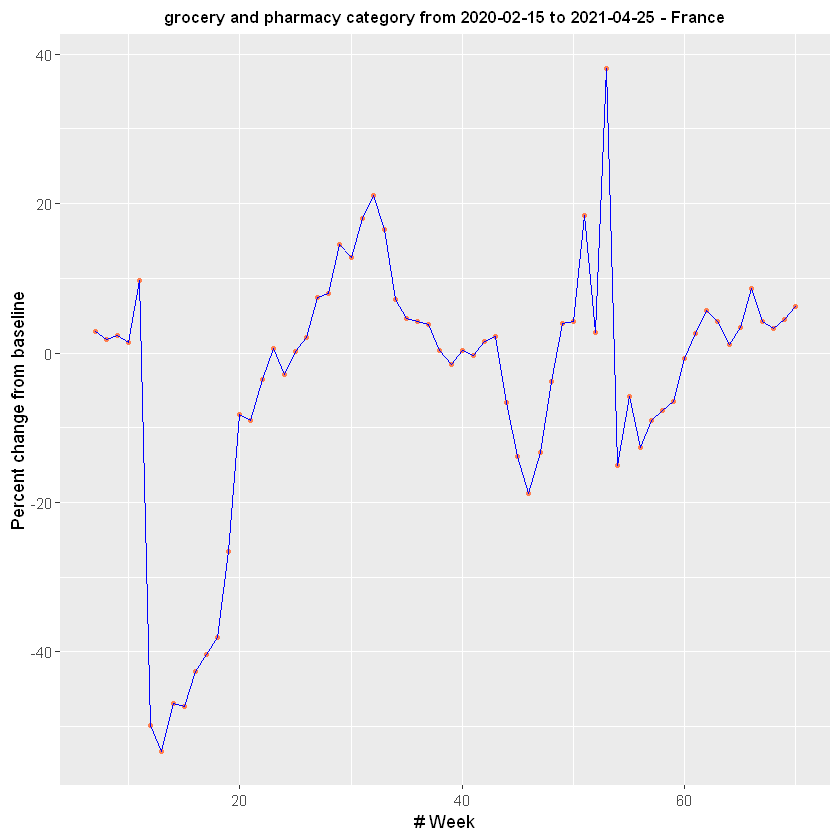

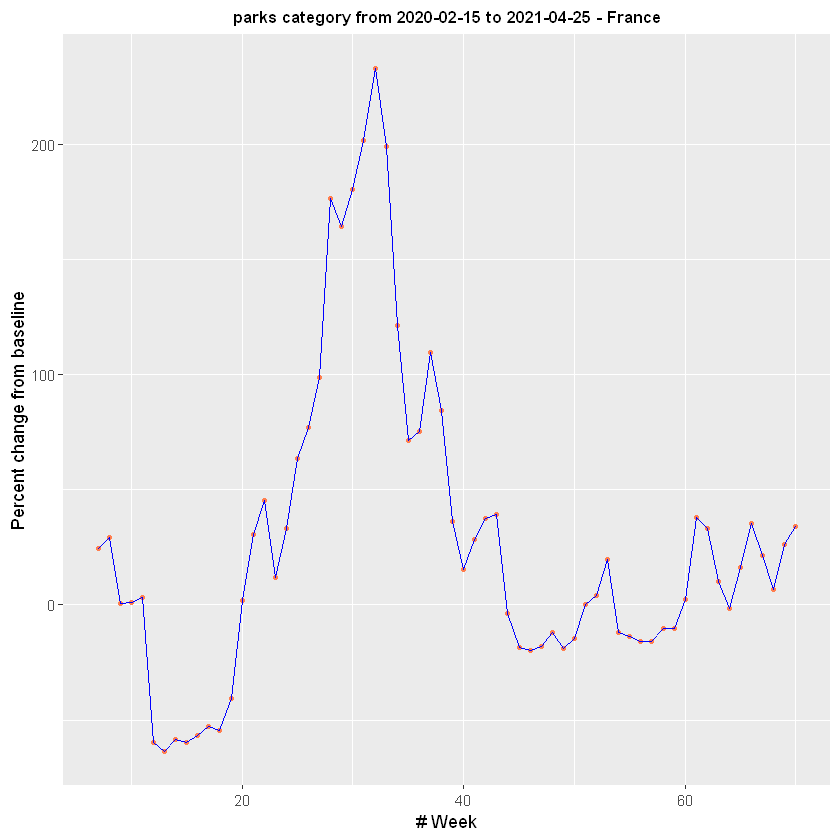

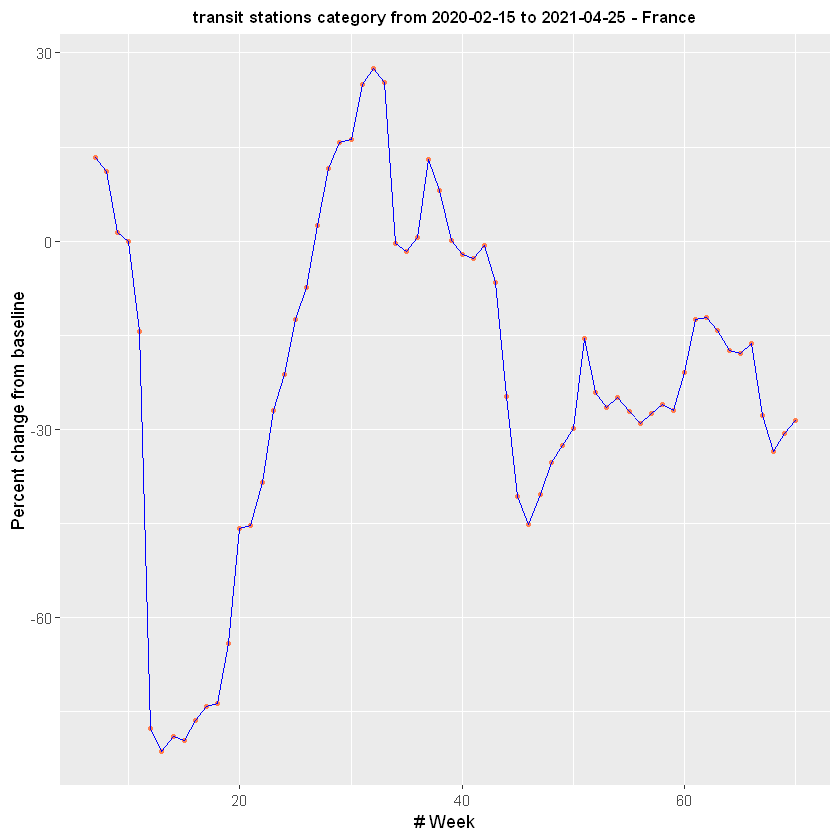

$`retail and recreation`

$`grocery and pharmacy`

$parks

$`transit stations`

$workplaces

$residential


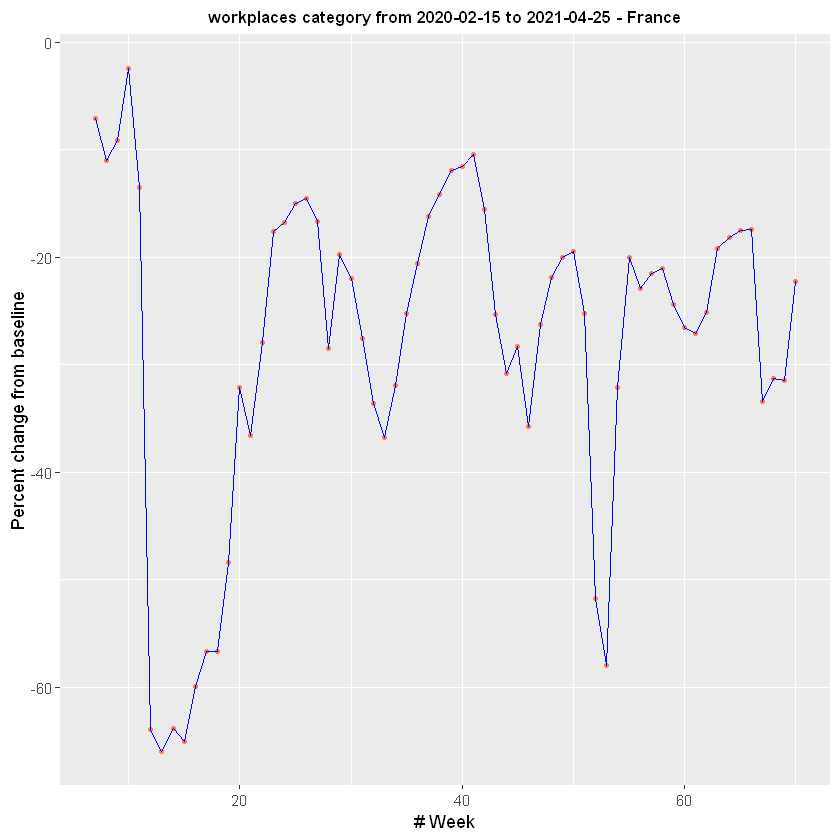

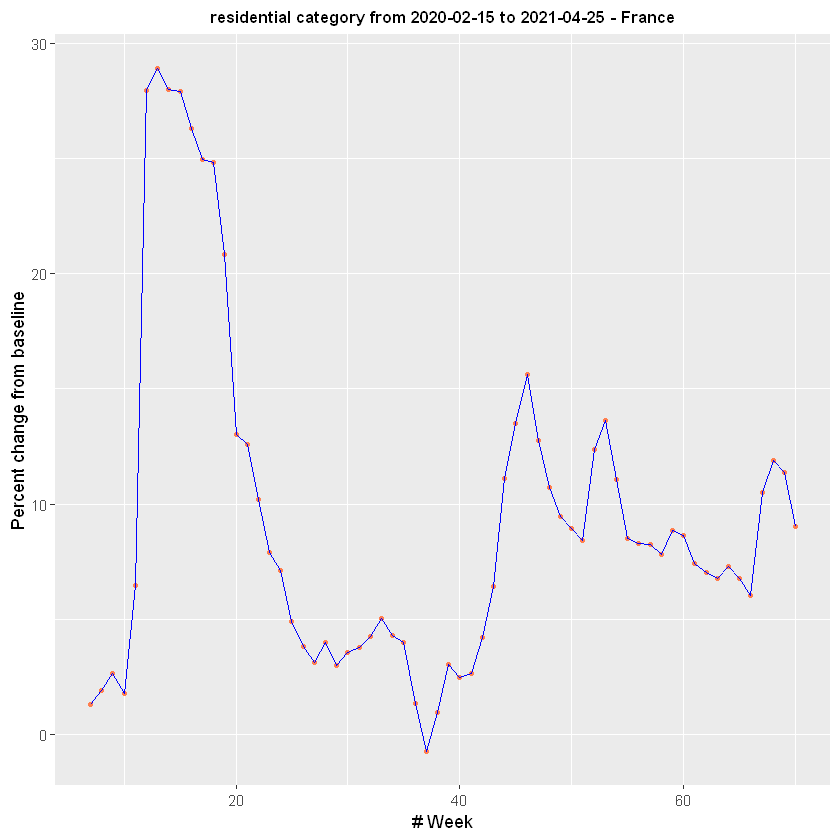

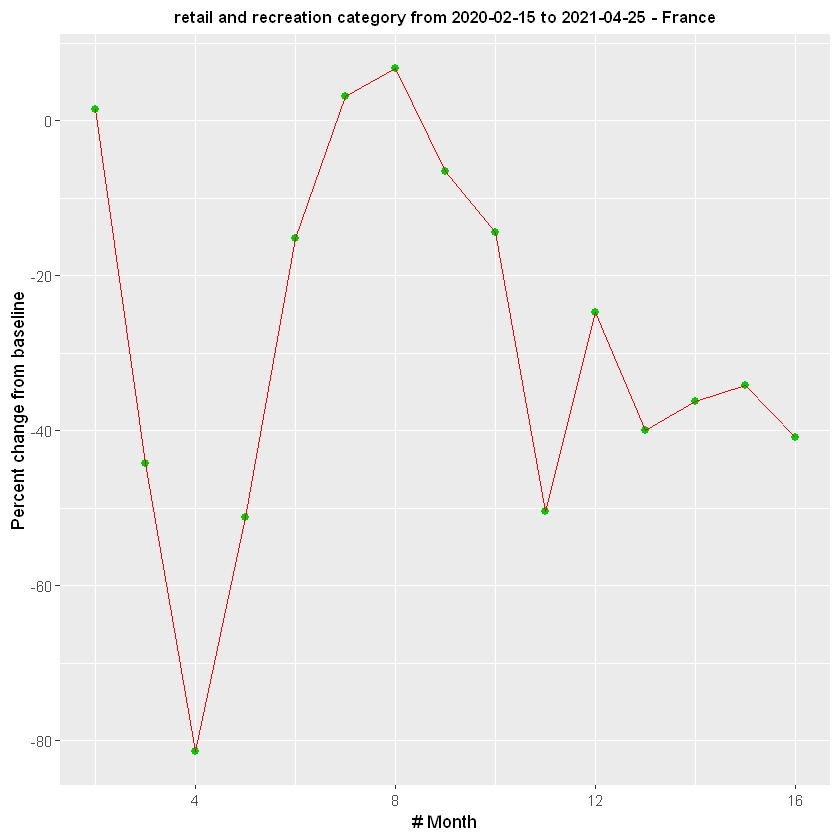

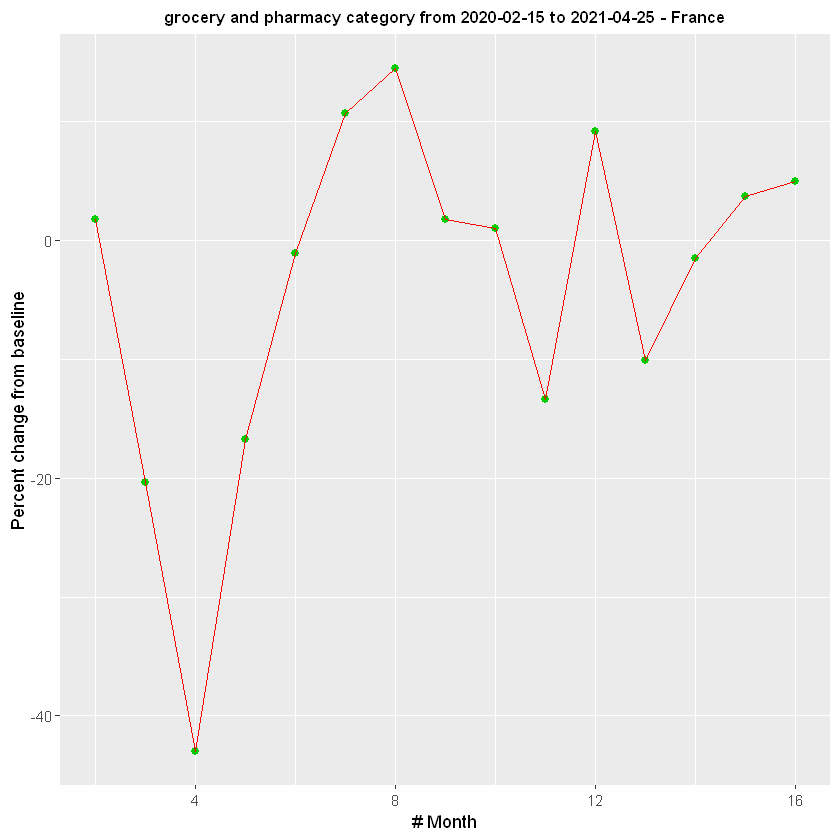

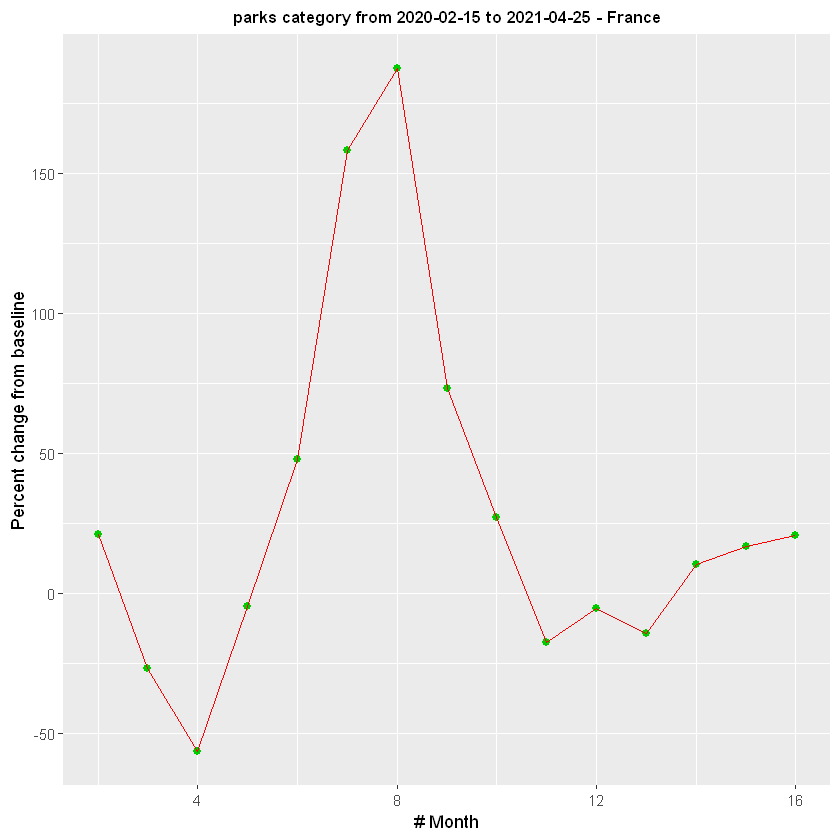

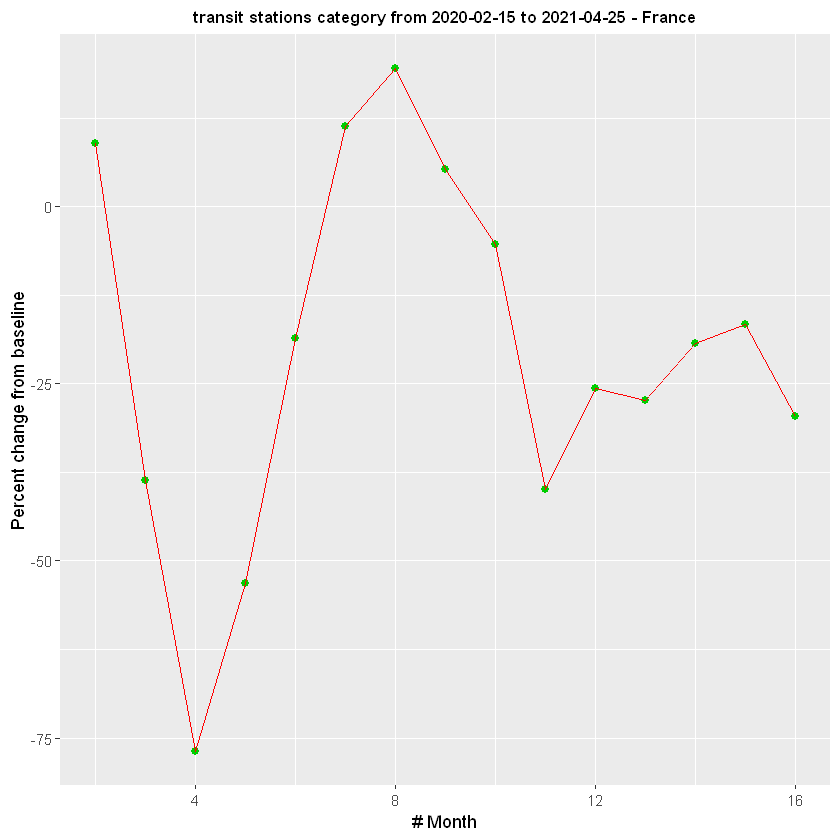

$`retail and recreation`

$`grocery and pharmacy`

$parks

$`transit stations`

$workplaces

$residential


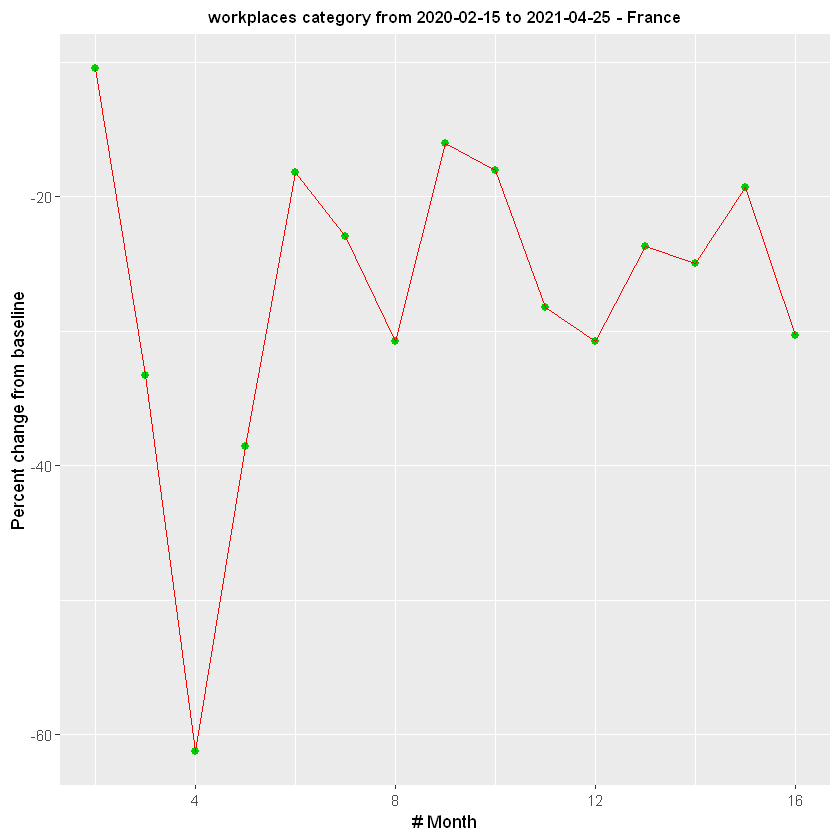

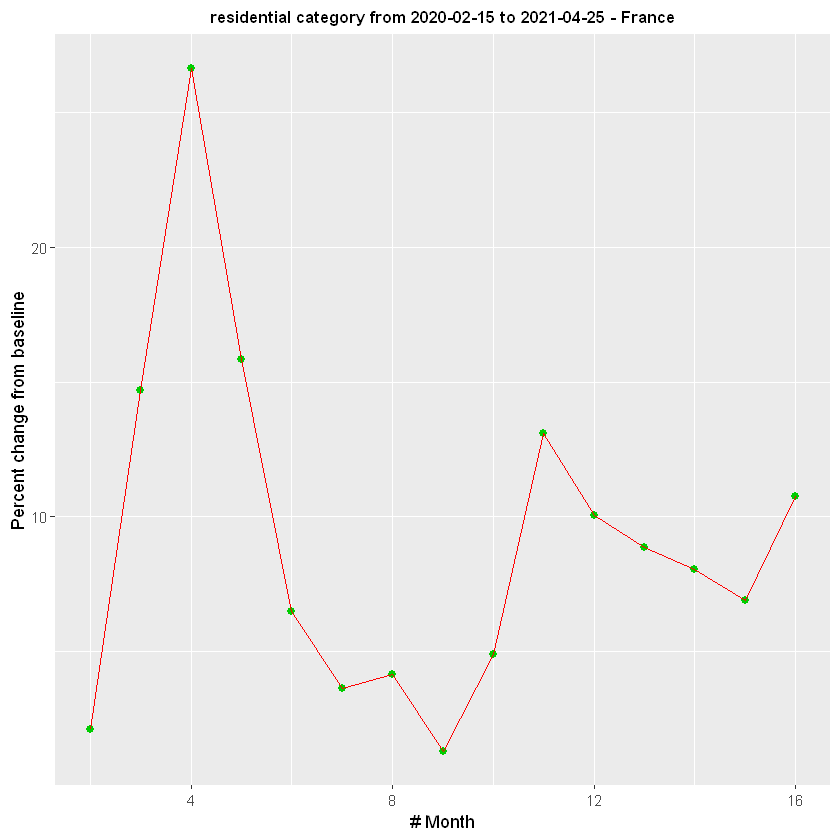

In [1]:
library(tidyverse)
library(lubridate)
library(ggplot2)

DFit1<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2020_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT1<-as_tibble(DFit1)%>%mutate("N.week"=week(date), "N.month"=month(date))
DFit2<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2021_IT_Region_Mobility_Report.csv"), header=T, sep=",") 
IT2<-as_tibble(DFit2)%>%mutate("N.week"=week(date), "N.month"=month(date)) 

DFit1<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2020_FR_Region_Mobility_Report.csv"), header=T, sep=",") 
FR1<-as_tibble(DFit1)%>%mutate("N.week"=week(date), "N.month"=month(date))
DFit2<-read.csv(unz("Region_Mobility_Report_CSVs.zip", "2021_FR_Region_Mobility_Report.csv"), header=T, sep=",") 
FR2<-as_tibble(DFit2)%>%mutate("N.week"=week(date), "N.month"=month(date)) 

Categ<-list("retail_and_recreation_percent_change_from_baseline", 
            "grocery_and_pharmacy_percent_change_from_baseline", 
            "parks_percent_change_from_baseline", 
            "transit_stations_percent_change_from_baseline", 
            "workplaces_percent_change_from_baseline",
            "residential_percent_change_from_baseline")

names(Categ)<-c("retail and recreation", 
            "grocery and pharmacy", 
            "parks", 
            "transit stations", 
            "workplaces",
            "residential")

Week<-function(z, name, A, B){
    w1<-A %>% group_by(N.week) %>% summarise("W"=mean(!!sym(z), na.rm=TRUE))
    w2<-B %>% group_by(N.week) %>% summarise("W"=mean(!!sym(z), na.rm=TRUE))
    
    w2$N.week<-w2$N.week+53
    
    ggplot(w1, aes(x=N.week,y=W))+
    geom_point(colour="coral", size=1)+
    xlab("# Week")+
    ylab("Percent change from baseline")+
    ggtitle(paste(name, "category from 2020-02-15 to 2021-04-25 -", A[[2]]))+
    theme(plot.title = element_text(size=10, face="bold", hjust = 0.5))+
    geom_point(data=w2, colour="coral", size=1)+
    geom_path(data=(rbind(w1, w2)), colour = "blue")  
}

Month<-function(z, name, A, B){
    m1<-A %>% group_by(N.month) %>% summarise("M"=mean(!!sym(z), na.rm=TRUE))
    m2<-B %>% group_by(N.month) %>% summarise("M"=mean(!!sym(z), na.rm=TRUE)) 
 
    m2$N.month<-m2$N.month+12
    
    ggplot(m1, aes(x=N.month,y=M))+
    geom_point(colour="green3", size=2)+
    xlab("# Month")+
    ylab("Percent change from baseline")+
    ggtitle(paste(name, "category from 2020-02-15 to 2021-04-25 -", A[[2]]))+
    theme(plot.title = element_text(size=10, face="bold", hjust = 0.5))+
    geom_point(data=m2, colour="green3", size=2)+
    geom_path(data=(rbind(m1, m2)), colour = "red")     
}

map2(Categ, names(Categ), Week, IT1, IT2)
map2(Categ, names(Categ), Month, IT1, IT2)
map2(Categ, names(Categ), Week, FR1, FR2)
map2(Categ, names(Categ), Month, FR1, FR2)